In [1]:
import pandas as pd
import numpy as np

In [2]:
trainData = pd.read_csv("./8a95c26e1bab11eb/dataset/train.csv")
trainData.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [3]:
testData = pd.read_csv("./8a95c26e1bab11eb/dataset/test.csv")
testData.head()

,image_id
0,7ede553357
1,3500b219e4
2,d43a78d6d9
3,1f36f26994
4,8cb85fc58e


In [4]:
# category of Data
categoryName = trainData["breed"].unique()

category_to_idx = {}
idx_to_category = {}

for index,value in enumerate(categoryName):
    category_to_idx[value] = index 
    idx_to_category[index] = value 

    
print(category_to_idx)
print(idx_to_category)

{'crotalus-ruber': 8, 'pantherophis-obsoletus': 3, 'pantherophis-vulpinus': 1, 'pantherophis-guttatus': 30, 'storeria-occipitomaculata': 19, 'thamnophis-sirtalis': 2, 'diadophis-punctatus': 23, 'nerodia-rhombifer': 18, 'coluber-constrictor': 21, 'pantherophis-emoryi': 33, 'thamnophis-marcianus': 12, 'nerodia-sipedon': 10, 'nerodia-fasciata': 14, 'haldea-striatula': 15, 'pituophis-catenifer': 28, 'crotalus-scutulatus': 34, 'crotalus-atrox': 5, 'thamnophis-proximus': 32, 'natrix-natrix': 22, 'masticophis-flagellum': 24, 'storeria-dekayi': 16, 'agkistrodon-contortrix': 4, 'lampropeltis-triangulum': 6, 'pantherophis-spiloides': 25, 'agkistrodon-piscivorus': 17, 'pantherophis-alleghaniensis': 31, 'lampropeltis-californiae': 27, 'nerodia-erythrogaster': 0, 'thamnophis-elegans': 11, 'heterodon-platirhinos': 9, 'thamnophis-radix': 20, 'rhinocheilus-lecontei': 26, 'crotalus-horridus': 7, 'crotalus-viridis': 13, 'opheodrys-aestivus': 29}
{0: 'nerodia-erythrogaster', 1: 'pantherophis-vulpinus', 2

In [5]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [6]:
class SnakeBreedDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,self.data.iloc[idx, 0]) + ".jpg"
        image = io.imread(img_name)
        
        categoryName = trainData.iloc[idx, 1]
        categoryIdx = float(category_to_idx[categoryName])
        
        sample = {'image': image, 'cat': categoryIdx}

        if self.transform:
            sample = self.transform(sample)

        return sample

NameError: name 'image' is not defined

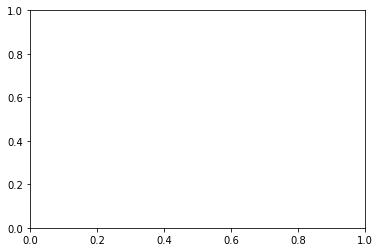

In [7]:
import os 
root_dir = "/train"
N = np.random.randint(0,len(trainData))



plt.grid(False)
plt.imshow(image)

In [8]:
def show_landmarks(image, cat):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.title(idx_to_category[cat])
    plt.pause(0.001)  # pause a bit so that plots are updated

0 (72, 128, 3) 0.0


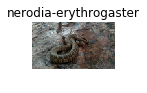

1 (171, 128, 3) 1.0


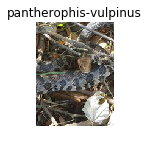

2 (171, 128, 3) 2.0


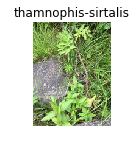

3 (228, 128, 3) 3.0


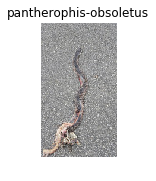

In [9]:
face_dataset = SnakeBreedDataset(
    csv_file='./8a95c26e1bab11eb/dataset/train.csv',
    root_dir='./8a95c26e1bab11eb/dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['cat'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

In [10]:
# divide dataset into category
trainData = pd.read_csv("./8a95c26e1bab11eb/dataset/train.csv")
trainData.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [13]:
import os

try:
    os.mkdir("./8a95c26e1bab11eb/dataset/tfData2")
    os.mkdir("./8a95c26e1bab11eb/dataset/tfData2/train")
    os.mkdir("./8a95c26e1bab11eb/dataset/tfData2/test")
except FileExistsError as f:
    pass

In [14]:
import subprocess
root_dir = "/home/saurav/Documents/hackerearth/Identify the snake breed/8a95c26e1bab11eb/dataset/tfData2/train"

def moveTheImage(data):
    try:
        img_name = data["image_id"] + ".jpg"        

        if not os.path.exists(os.path.join(root_dir,data["breed"])):
            os.mkdir(os.path.join(root_dir,data["breed"]))

        src_img_full_path = os.path.join("/home/saurav/Documents/hackerearth/Identify the snake breed/8a95c26e1bab11eb/dataset/train",img_name)

        dist_img_full_path = os.path.join(os.path.join(root_dir,data["breed"]),img_name)

#         print(src_img_full_path)
#         print(dist_img_full_path)

        subprocess.run('cp "%s" "%s"'%(src_img_full_path,dist_img_full_path),shell=True)
    except:
        print(img_name)
    
    
for i in range(len(trainData)):
    moveTheImage(trainData.iloc[i])

In [35]:
# using keras load image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [61]:
data_dir = "./8a95c26e1bab11eb/dataset/tfData/train"
batch_size = 4
img_height = 112
img_width=112
num_classes = 35


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 5508 files belonging to 35 classes.
Using 4407 files for training.
Found 5508 files belonging to 35 classes.
Using 1101 files for validation.


In [62]:
from tensorflow.keras import layers

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 112, 112, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)       

In [65]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1102/1102 [==============================] - 47s 42ms/step - loss: 3.4039 - accuracy: 0.0842 - val_accuracy: 0.0718 - val_loss: 3.3658
Epoch 2/10
1102/1102 [==============================] - 42s 38ms/step - loss: 3.3798 - accuracy: 0.0896 - val_accuracy: 0.0718 - val_loss: 3.3633
Epoch 3/10
1102/1102 [==============================] - 46s 42ms/step - loss: 3.3749 - accuracy: 0.0903 - val_accuracy: 0.0999 - val_loss: 3.3691
Epoch 4/10
1102/1102 [==============================] - 44s 40ms/step - loss: 3.3639 - accuracy: 0.0969 - val_accuracy: 0.0590 - val_loss: 3.3803
Epoch 5/10
1102/1102 [==============================] - 45s 41ms/step - loss: 3.3333 - accuracy: 0.1089 - val_accuracy: 0.0763 - val_loss: 3.3812
Epoch 6/10
1102/1102 [==============================] - 46s 42ms/step - loss: 3.2770 - accuracy: 0.1209 - val_accuracy: 0.0736 - val_loss: 3.4085
Epoch 7/10
  35/1102 [..............................] - ETA: 38s - loss: 3.3824 - accuracy: 0.1214

KeyboardInterrupt: 

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [88]:
import datetime
# for tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
%tensorboard --logdir logs/fit

In [89]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [68]:
# finetuning
# Create the base model from the pre-trained model MobileNet V2
BATCH_SIZE = 32
IMG_SIZE = (160, 160)


IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(4, 3, 3, 1280)


In [69]:
base_model.trainable = False
base_model.summary()


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [70]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(4, 1280)


In [81]:
prediction_layer = tf.keras.layers.Dense(35)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(4, 35)


In [82]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [83]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_10 (Sequential)   (None, None, None, 3)     0         
_________________________________________________________________
tf_op_layer_RealDiv_1 (Tenso [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_1 (TensorFlo [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)             

In [90]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[tensorboard_callback])

Epoch 1/10
   1/1102 [..............................] - ETA: 0s - loss: 3.0399 - accuracy: 0.5000WARNING:tensorflow:From /home/saurav/anaconda3/envs/datascience/lib/python3.5/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1102/1102 [==============================] - 34s 31ms/step - loss: 2.5664 - accuracy: 0.2884 - val_accuracy: 0.2289 - val_loss: 3.1236
Epoch 2/10
1102/1102 [==============================] - 32s 29ms/step - loss: 2.5252 - accuracy: 0.2929 - val_accuracy: 0.2325 - val_loss: 3.0999
Epoch 3/10
1102/1102 [==============================] - 22s 20ms/step - loss: 2.4663 - accuracy: 0.2993 - val_accuracy: 0.2280 - val_loss: 3.1077
Epoch 4/10
1102/1102 [==============================] - 22s 20ms/step - loss: 2.4192 - accuracy: 0.3168 - val_accuracy: 0.2325 - val_loss: 3.0998
Epoch 5/10
1102/1102 [=

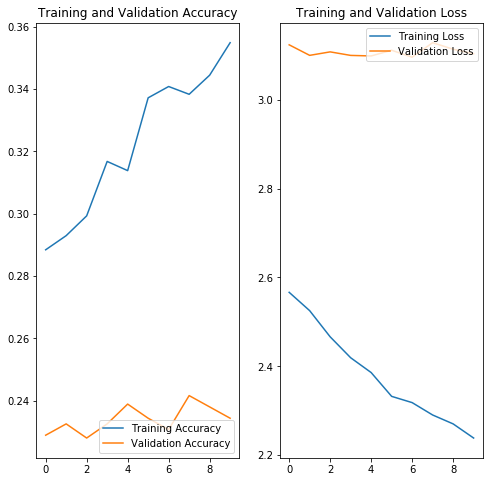

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from numpy import moveaxis
import cv2


# submission
submission_data = []

# best_model = tf.keras.models.load_model(save_path + "model0.h5")
img_paths = "./8a95c26e1bab11eb/dataset/test"

LABELS = train_ds.class_names
print(class_names)

for img_path in os.listdir(img_paths):
    path = img_paths + "/" + img_path 
    img = image.load_img(path, target_size=(224,224))
    x = image.img_to_array(img)

    x = np.expand_dims(x, axis=0)

    images = torch.tensor(x).cuda()
    outputs = model_ft.predict([images])
    _, preds = torch.max(outputs, 1)
    label = LABELS[preds]
    submission_data.append([img_path,label])
else:
    print("Done. Saving in dataframe for Submission")
    submission_data = pd.DataFrame(data=submission_data,columns=["Filename","Category"],index=None)
    print(submission_data.head())

In [102]:
img_paths = "./8a95c26e1bab11eb/dataset/test"

for img_path in os.listdir(img_paths):
    path = img_paths + "/" + img_path
    
    img = image.load_img(path, target_size=(224,224))
    
    x = image.img_to_array(img)

    x = np.expand_dims(x, axis=0)
    break
    
    

NameError: name 'image' is not defined

In [96]:
outputs = model.predict(np.random.randn(1,160,160,3))

In [97]:
outputs

array([[-3.001146  , -2.4692078 , -3.5382445 ,  0.31004384, -3.4779303 ,
        -3.922092  , -3.2133865 , -0.88009727, -4.360179  , -4.779767  ,
        -4.037068  , -4.0520015 , -4.482984  , -4.0655003 , -4.0928617 ,
        -2.3903108 , -4.4669557 , -2.465574  , -2.9105382 , -3.5124528 ,
        -2.8221717 , -2.955197  , -4.0956707 , -1.469741  , -5.238824  ,
        -3.9450035 , -1.9820687 , -1.9794316 , -2.8386724 , -6.545035  ,
        -3.9853213 , -3.14081   , -4.017935  , -3.3187673 , -3.8982127 ]],
      dtype=float32)

In [100]:
class_names = train_ds.class_names
class_names[np.argmax(outputs)]

'crotalus-atrox'

In [137]:
import pathlib
import PIL

data_dir = pathlib.Path("./8a95c26e1bab11eb/dataset/test")
roses = list(data_dir.glob('*.jpg'))
print(str(roses[0]))

# image = PIL.Image.open(str(roses[0]))


# image = tf.keras.preprocessing.image.load_img(str(roses[0]))
# input_arr = tf.keras.preprocessing.image.img_to_array(image)
# input_arr = np.array([input_arr])  # Convert single image to a batch.
# predictions = model.predict(input_arr)
# print(predictions)

8a95c26e1bab11eb/dataset/test/b68aec61a9.jpg


In [140]:
import pathlib
import PIL

img_paths = "./8a95c26e1bab11eb/dataset/test"
data_dir = pathlib.Path(img_paths)
roses = list(data_dir.glob('*.jpg'))

LABELS = train_ds.class_names

# submission
submission_data = []

for img_index in range(len(roses)):    
    
    image = tf.keras.preprocessing.image.load_img(str(roses[img_index]))
    
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    
    predictions = model.predict(input_arr)
    
    label = LABELS[np.argmax(predictions)]
    
    image_id = str(roses[img_index]).split("/")[-1].split(".")[0]

    submission_data.append([image_id,label])
else:
    print("Done. Saving in dataframe for Submission")
    submission_data = pd.DataFrame(data=submission_data,columns=["image_id","breed"],index=None)
    print(submission_data.head())

Done. Saving in dataframe for Submission
     image_id                  breed
0  b68aec61a9        storeria-dekayi
1  eaedb4aeea         crotalus-atrox
2  c98bc697c6  pantherophis-guttatus
3  728f07bb97         crotalus-atrox
4  93c3acd68a         crotalus-atrox


In [139]:
print("Done. Saving in dataframe for Submission")
submission_data = pd.DataFrame(data=submission_data,columns=["image_id","breed"],index=None)
print(submission_data.head())

Done. Saving in dataframe for Submission
     image_id            breed
0  b68aec61a9  storeria-dekayi


In [141]:
import time

if not os.path.exists("./submission"):
    os.mkdir("submission")
save_submission_path = "./submission/%s.csv"%(time.ctime())
submission_data.to_csv(save_submission_path,index=False)

# files.download(save_submission_path)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('./8a95c26e1bab11eb/dataset/tfData/train/agkistrodon-contortrix/1ffbcaee3e.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save('first_try.h5')  # always save your weights after training or during training

In [ ]:

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [31]:
directory = "/home/saurav/Documents/hackerearth/Identify the snake breed/8a95c26e1bab11eb/dataset/tfData/train"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=4,
    image_size=(224, 224),
    shuffle=True
)

Found 5508 files belonging to 35 classes.


In [34]:
len(dataset)

1377

In [ ]:
fea36f2dd1.jpg
